<h1> This is a tool to analyze GLC in English courpus </h1><p>
    
The only thing the new user need to do is to set name = 'XXX', where XXX is the name of your file. <p>
    
<font color='red' size='4'> <b>This program runs case by case.</b><br></font><p>
If you want to run with multiple files, use Run_All.ipynb<p>
    
    
<font color='red' size='4'> <b>location of funtions </b><br></font><p>
 
<font color='blue' size='4'>1. Module > count.py <p>
    (see the main paper for physical meaning)</font><p>
(1) info() <p>
(2) count_allo() <p>
(3) N_syl_dist() <p>
(4) geometric_sequence() <p>
(5) which_plot() <p>
(6) FRD_plot() <p>
(7) draw_RRD_plot() <p>
(8) Allo_plot() <p>
(9) Chain_plot() <p>
(10) write_to_excel() <p>

<font color='blue' size='4'>2. Module > denoise.py <p>
    (see SI for physical meaning) </font><p>
(1) plot_g() <p>
(2) rg() <p>
(3) fit_with_cut() <p>
  
<font color='blue' size='4'>3. Module > network.py <p>
    (see the main paper for physical meaning)</font><p>
(1) build_edge() <p>
(2) plot_cluster_word() <p>
(3) plot_degree_word() <p>
(4) plot_cluster_syl() <p>
(5) plot_degree_syl() <p>
(6) build_shortest_path() <p>
(7) plot_shortest_path() <p>
(8) build_shortest_path() <p>
(9) plot_shortest_path() <p>

In [1]:
import time
import bisect 
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Module.count import *
from Module.allo_chain import *
from Module.denoise import *
from Module.Curve_Fitting_MLE import *
from Module.network import *
from scipy.optimize import curve_fit
from matplotlib import rcParams

#https://matplotlib.org/3.1.1/tutorials/text/mathtext.html
plt.style.use('classic')
%matplotlib inline


In [2]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.
name = 'Human'
filename = name + '.txt' #change filename if you want to get statictical information of another txt file

In [3]:
##text file.
tStart = time.time()
big, syl, word, longest = info(filename, encode)
count_allo(word, syl)
tEnd = time.time()
print('runtime:', tEnd - tStart)

read file successfully!
Successfully count word freqency!(Human.txt)
Successfully count syl freqency!
Successfully build data frames!
runtime: 9.586964845657349


<font color='blue' size='4'><b>The following pandas dataFrames will be saved in a excel file</b><br></font>

big: including frequency and rank for each word = (syl_1, syl_2, syl_3 ...)

word: including the FRD and Chain of word

syl: including the FRD and Allo of syllagram


In [4]:
#save file, read detials in count.py
#if you don't want to save it, just # it

#write_to_excel(big, word, syl, name)

<font color='blue' size='4'><b>N-syllagram distribution $\rho(N)$ </b><br></font>
N-syl means there are N syllagrams in one word, it can be 1, 2, 3..., etc. This function can print their distribution

In the function <font color='blue'>N_syl_dist(name, big, longest, FORMAT = 'png', Path = '')</font>, you can change the following parameters:<br>

1. FORMAT: png, pdf, ps, eps and svg<br>
    the format of plot (support: 'png', 'pdf', 'ps', 'eps' and 'svg')
    
2. Path: the path of saving figure<br>
    if Path == '', the figure will be saved at current document<br>
    else if Path == np.nan, no figure will be saved (just show it)<br>
    else, the figure will be saved according to Path<br>

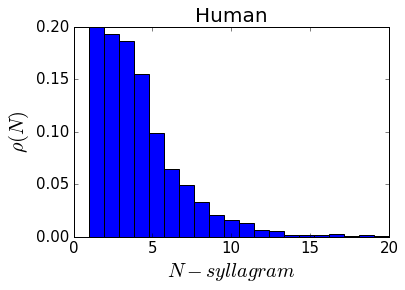

In [5]:
N_syl_dist(name, big, longest, FORMAT = 'png', Path = np.nan)

<font color='blue' size='4'><b>check ratio of geometric sequence {$H_{\ell}$} </b><br></font>

In the function <font color='blue'>which_plot(x = 'H', SP = 'T', FORMAT = 'png')</font>, you can change the following parameters:<br>

1. max_range: number<br>
    the number of elements in the sequence you want to know<br>

2. x: 'H' or 'V'<br>
    you can chose the sequence you want (H/V)<br>

3. SP: 'T' or other string<br>
    if you want to save your plot, give it 'T'; otherwise give anything expect 'T'<br>

4. FORMAT: png, pdf, ps, eps and svg<br>
    if SP == 'T', give it the format you want

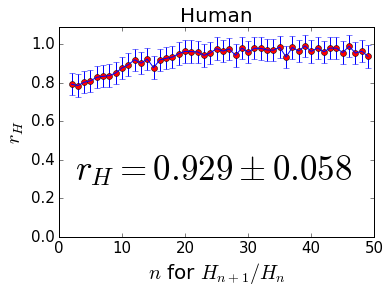

In [6]:
V, H = geometric_sequence(word, syl)
max_range = 50 #the number of elements in the sequence you want to know
x = 'H'
shift = 'N' #If you don't want to measure shift, just assign shift != 'T'.
FORMAT = 'pdf' #the format of your picture


RH = which_plot(name, V, H, x, max_range, shift, FORMAT)

<font color='blue' size='4'><b>Heaps Law </b><br></font>

wiki: https://en.wikipedia.org/wiki/Heaps%27_law<br>

$V_R(k)=Kk^{\beta}$

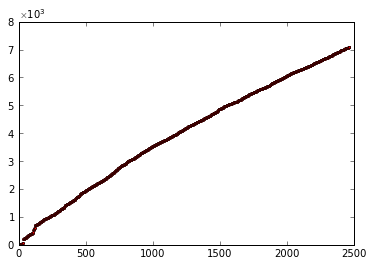

In [7]:
Seqword = word.sort_values(by='wordSeqOrder', ascending = True)
Seqword = Seqword.reset_index(drop = True)
Heaps = {}
Heaps['Seq'] = [0 for i in range(len(Seqword['wordSeqOrder']))]
Heaps['freq'] = [0 for i in range(len(Seqword['wordSeqOrder']))]

Counts = 0
C = []
for i in range(len(Seqword['wordFreq'])):
    Counts += Seqword['wordFreq'][i]
    Heaps['freq'][i] = Counts
    Heaps['Seq'][i] = Seqword['wordSeqOrder'][i]

    
fig, ax = plt.subplots(1, 1)
plt.plot(Heaps['Seq'], Heaps['freq'], 'ro', markersize = 2)
formatter = ticker.ScalarFormatter(useMathText=True) #https://atmamani.github.io/cheatsheets/matplotlib/matplotlib_2/
#formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter)
plt.show()

<font color='blue' size='4'><b> draw FRD plot of words and syllagrams </b><br></font>
If you want to save picture, pleast assign SP = 'T'.<br>
FORMAT is used to decide the format of your picture.

/Users/lab/Downloads/Genetics-Linguistics-Correspondence/Scaling-linguistics/English/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: divide by zero encountered in true_divide
  P = P + 1 / k ** s
/Users/lab/Downloads/Genetics-Linguistics-Correspondence/Scaling-linguistics/English/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: overflow encountered in true_divide
  P = P + 1 / k ** s


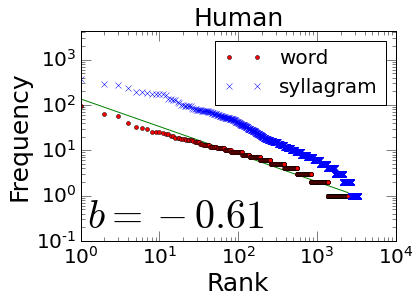

In [8]:
SP = 'T' #If you want to save picture, pleast assign SP = 'T'
FORMAT = 'pdf' #the format of your picture
x_pos = 0
y_pos = 0

Zipf = FRD_plot(name, word, syl, x_pos, y_pos, FORMAT)

<font color='blue' size='4'><b>draw RRD plot </b><br></font>

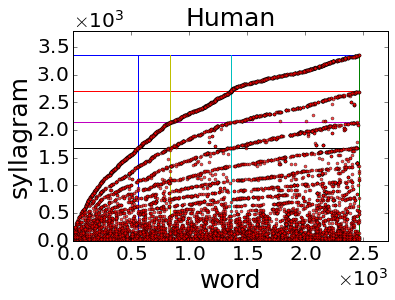

In [9]:
need_line = 'Y'
number_of_lines = 4
Color = '#ff0000'
FORMAT = 'pdf' #the format of your picture


coordinate = draw_RRD_plot(big, word, syl, longest, name, V, H,
                           need_line, number_of_lines, Color, FORMAT)

<font color='blue' size='4'><b> draw allocation-rank plot </b><br></font>
If you want to save picture, pleast assign SP = 'T'.<br>
FORMAT is used to decide the format of your picture.

Allo_fit = ($\alpha, \beta$)

<ref>Reference for fitting<br>
1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
2. https://lmfit.github.io/lmfit-py/intro.html

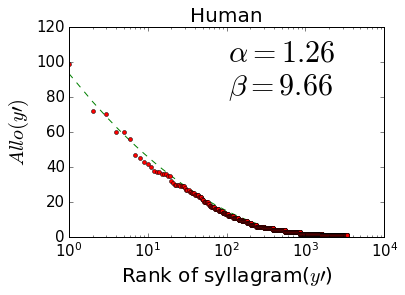

In [10]:
FORMAT = 'png' #the format of your picture
x_pos = 0 #auto positioning = 0; otherwise change the value you want
y_pos = 0 #auto positioning = 0; otherwise change the value you want


Allo_fit = Allo_plot(name, syl, x_pos, y_pos, FORMAT)

<font color='blue' size='4'><b> draw chain-rank plot </b><br></font>

Chain_fit = ($\gamma, \omega$)

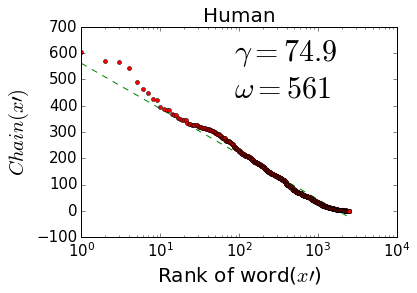

In [11]:
FORMAT = 'png' #the format of your picture
x_pos = 0 #auto positioning = 0; otherwise change the value you want
y_pos = 0 #auto positioning = 0; otherwise change the value you want


Chain_fit = Chain_plot(name, word, x_pos, y_pos, FORMAT)    

<font color='blue' size='4'><b> pick up points on scaling lines </b><br></font>
The following function is used to denosing of RRD plot and find scaling lines.<p>

---paramenters<p>
    
    L: int, <=10
        the number of scaling lines you want to denoise
    
    toler: float
        control the tolerance of minimize(Tv)
    
    num_part: int
        number of windows that are used to doing coarse-grain
    
    num_section: int, default = 3
        didive each rectangle in num_section parts to examine the local cocavity and convexity
    
        NOTICE: increase this number will slow down the speed of de-noising algorithm
    
    delta: float, >= 0
        see Appendix of SI for details
        affect the tolerance of left_upper()
    
    percent: float
        see Appendix of SI for details
        affect the tolerance of left_upper()
    
---output<p>
g: set, $\{g_1, g_2,...\}$, where $g_k = (x_{avg}, y_{avg}), x/y_{avg}$ is points after coarse-grain <br>
glu: set, $\{glu_1, glu_2,...\}$, where $glu_k = (lupx, lupy)_k$, and $lupx/y$ denote points on scaling line $g_k$ after denoising<br>

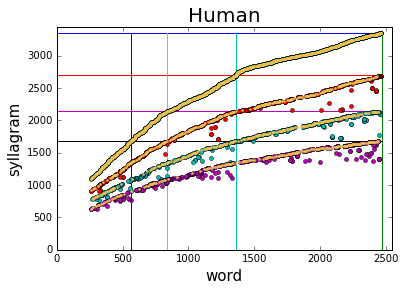

runtime: 10.406183958053589


In [12]:
kwargs = {'toler' : 50,
'num_part' : 50,
'num_section' : 1,
'delta' : 0.15,
'percent' : 0.05}
L = 4

tStart = time.time()
g, glu = plot_g(L, V, H, big, name, longest, **kwargs)
tEnd = time.time()
print('runtime:', tEnd - tStart)

<font color='blue' size='4'><b> calculate SC value </b><br></font>
We use coarse-grain data to calculate $r_g$, $S$ and $C$ value. <br>
If you want to pick up the points on scaling line and save them in excel, you can calculate $r_g$ of your data by "draw ratio of scaling function/Run_case_by_case.ipynb". <br>

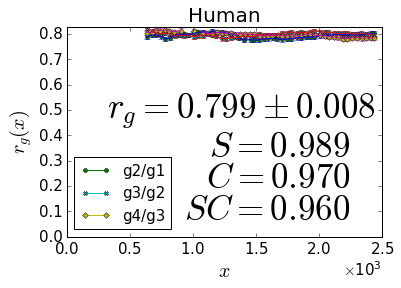

In [13]:
FORMAT = 'pdf' #the format of your picture

Rg = rg(name, g, FORMAT)

<font color='blue' size='4'><b> scaling fitting </b><br></font>
find out best fitting curve for scaling lines <br>
    select $g_1\sim g_4$ to be basis of scaling function, after that find out the best basis and parameters
    by check deviation of different basis.
    
   For instance, use $g_2$ to be basis
   0. fitting $g_2$ with theory model
   1. $g_1 = g_2/R_g, g_3 = R_g\times g_2, g_4 = R_g^2\times g_2......$
   2. tot_Dev['g2'] = $\sum(y_i - R_g^{i-2}g_2)^2$, where $y_i$ is real data and $g_i=R_g^{i-2}g_2$ is theory
   3. check all possible and resonable basis, findout the smallest tot_Dev['gn'] 

detail: Module/denoise.py <br> 

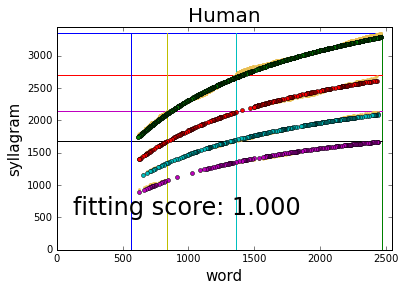

fitting range = [617, 2468]


(array([4246.89877388,  249.90298822]),
 array([[158.18561027,  13.76116699],
        [ 13.76116699,   1.26006538]]))

In [14]:
FORMAT = 'png' #the format of your picture
        
fit_with_cut(glu, Rg[0], V, H, Zipf, name, FORMAT)

<font color='blue' size='4'><b>Network analysis</b><br></font>

In [15]:
graph_block, graph_compo = build_edge(coordinate)
G_block, cluster_block, block_degree_sequence = graph_block[0], graph_block[1], graph_block[2]
G_compo, cluster_compo, compo_degree_sequence = graph_compo[0], graph_compo[1], graph_compo[2]

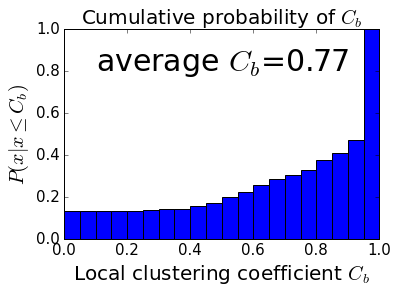

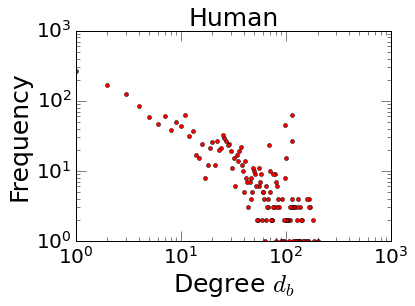

In [16]:
plot_cluster_block(name, cluster_block, FORMAT = 'pdf', Path = '')
plot_degree_block(name, block_degree_sequence, FORMAT = 'pdf', Path = '')

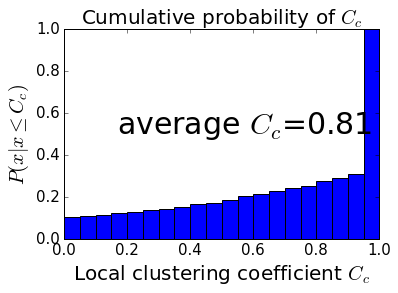

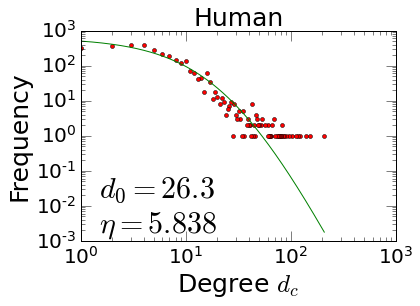

In [17]:
plot_cluster_compo(name, cluster_compo, FORMAT = 'pdf', Path = '')
plot_degree_compo(name, compo_degree_sequence, FORMAT = 'pdf', Path = '')

runtime: 5.499400854110718


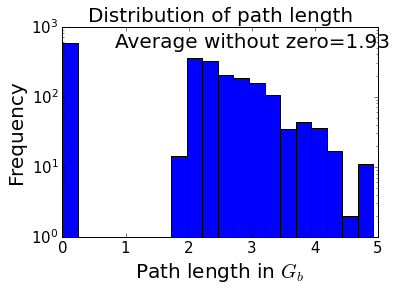

exclude zero path, the avg_path is 1.928640404442046


In [18]:
tStart = time.time()
sum_shortest_path_block = build_shortest_path(G_block)
tEnd = time.time()
print('runtime:', tEnd - tStart)


plot_shortest_path(name, sum_shortest_path_block, G_name = '$G_b$')

runtime: 6.755075931549072


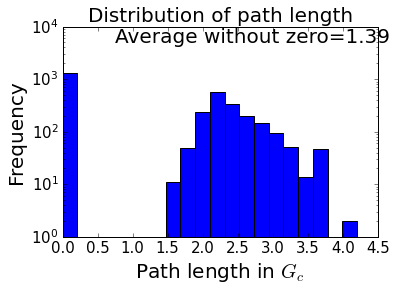

exclude zero path, the avg_path is 1.3864402491463719


In [19]:
tStart = time.time()
sum_shortest_path_compo = build_shortest_path(G_compo)
tEnd = time.time()
print('runtime:', tEnd - tStart)


plot_shortest_path(name, sum_shortest_path_compo, G_name = '$G_c$')